In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
"""
Features

RM: average number of rooms per dwelling
LSTAT: percentage of population considered lower status(poor)
PTRATIO: pupil-teacher ratio by town in primary and secondary schools in the neighborhood.
Target Variable 4. MEDV: median value of owner-occupied homes
"""

'\nFeatures\n\nRM: average number of rooms per dwelling\nLSTAT: percentage of population considered lower status(poor)\nPTRATIO: pupil-teacher ratio by town in primary and secondary schools in the neighborhood.\nTarget Variable 4. MEDV: median value of owner-occupied homes\n'

In [5]:
data = pd.read_csv("C:/Users/Shruthi M/Desktop/Projects/Linear Regression/Boston_Housing/housing.csv")
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
data[data['RM']>8]

,RM,LSTAT,PTRATIO,MEDV
97,8.069,4.21,18.0,812700.0
217,8.266,4.14,17.4,940800.0
218,8.040,3.13,17.4,789600.0
224,8.337,2.47,17.4,875700.0
225,8.247,3.95,17.4,1014300.0
245,8.259,3.54,19.1,898800.0
253,8.398,5.91,13.0,1024800.0


In [7]:
data.shape

(489, 4)

In [8]:
data.count()

RM         489
LSTAT      489
PTRATIO    489
MEDV       489
dtype: int64

In [9]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [10]:
# No null values present in data
data.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

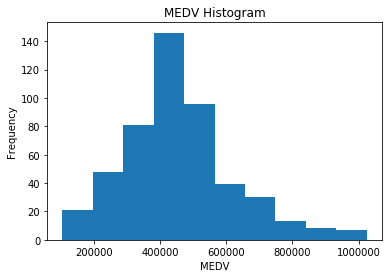

In [11]:
import matplotlib.pyplot as plt
# Distribution of price
plt.hist(data['MEDV'])
plt.title("MEDV Histogram")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

In [12]:
min(data['MEDV'])

105000.0

In [13]:
max(data['MEDV'])

1024800.0

In [14]:
data['MEDV'].mean()

454342.9447852761

In [15]:
# Creating buckets for price (MEDV)
break_points = [100000,500000,800000, 1100000]
break_points

[100000, 500000, 800000, 1100000]

In [16]:
# Labelling the buckets as low,high and medium
labels=['Low','Medium','High']

In [17]:
data['MEDVbucket'] = pd.cut(data['MEDV'], bins = break_points,labels=labels,include_lowest=True)
data['MEDVbucket'].head()

0    Medium
1       Low
2    Medium
3    Medium
4    Medium
Name: MEDVbucket, dtype: category
Categories (3, object): [Low < Medium < High]

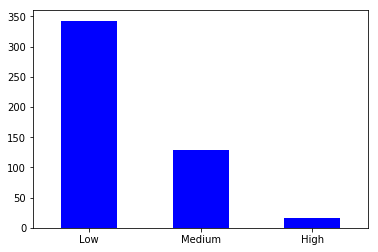

In [18]:
data['MEDVbucket'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

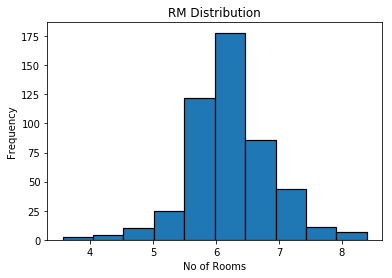

In [19]:
# Plotting the distribution of the RM attribute
plt.hist(data['RM'],edgecolor='black', linewidth=1.2)
plt.xlabel('No of Rooms')
plt.ylabel('Frequency')
plt.title('RM Distribution')
plt.grid(False)
plt.show()

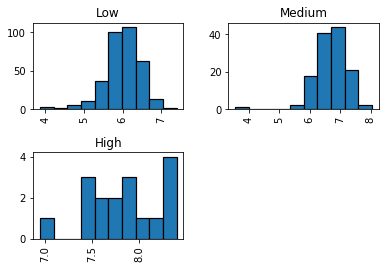

In [20]:
# Plotting the distribution of the RM attribute for all three buckets
data['RM'].hist(by=data['MEDVbucket'],edgecolor='black', linewidth=1.2)
plt.show()

In [21]:
'''
'RM' is a count of rooms in the house, i.e. the larger the amount of rooms that it has the larger it would be. Therefore,
an increase in this value is expected to increase the value of 'MEDV'.
'''

"\n'RM' is a rough indicator of the house size, i.e. the larger the amount of rooms that it has the larger it would be. Therefore,\nan increase in this value is expected to increase the value of 'MEDV'.\n"

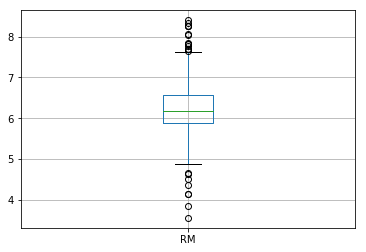

In [22]:
data[['RM']].boxplot()
plt.show()

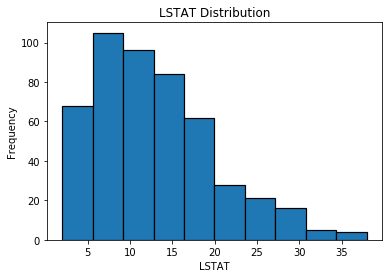

In [23]:
# Plotting the distribution of the LSTAT attribute
plt.hist(data['LSTAT'],edgecolor='black', linewidth=1.2)
plt.xlabel('LSTAT')
plt.ylabel('Frequency')
plt.title('LSTAT Distribution')
plt.grid(False)
plt.show()

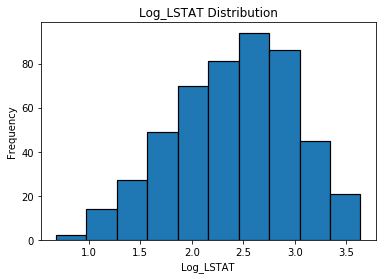

In [24]:
# The LSTAT is right skewed, so transforming the data and viewing the distribution
import numpy as np
data['Log_LSTAT'] = np.log(data['LSTAT'])
plt.hist(data['Log_LSTAT'],edgecolor='black', linewidth=1.2)
plt.xlabel('Log_LSTAT')
plt.ylabel('Frequency')
plt.title('Log_LSTAT Distribution')
plt.grid(False)
plt.show()

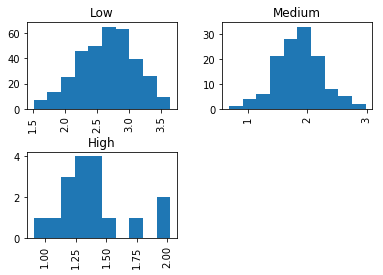

In [25]:
# Plotting the distribution of the Log_LSTAT attribute for all three buckets
data['Log_LSTAT'].hist(by=data['MEDVbucket'])
plt.figure(figsize=(3,4))
plt.show()

In [26]:
'''
'LSTAT' is an indicator of the low class of the respective neighborhood. Meaning if the percentage of homeowners that are 
considered "lower class" is higher the class of the neighborhood is lower. Therefore, an increase of 'LSTAT' will decrease 
the value of 'MEDV'.
'''

'\n\'LSTAT\' is an indicator of the low class of the respective neighborhood. Meaning if the percentage of homeowners that are \nconsidered "lower class" is higher the class of the neighborhood is lower. Therefore, an increase of \'LSTAT\' will decrease \nthe value of \'MEDV\'.\n'

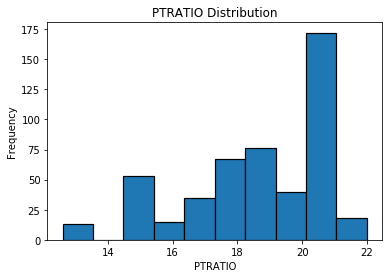

In [27]:
# Plotting the distribution of the LSTAT attribute
plt.hist(data['PTRATIO'],edgecolor='black', linewidth=1.2)
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.title('PTRATIO Distribution')
plt.grid(False)
plt.show()

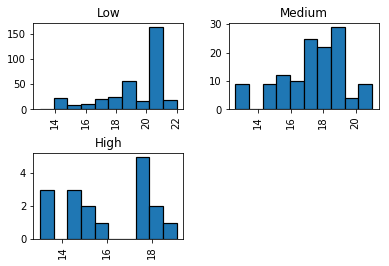

In [28]:
# Plotting the distribution of the PTRATIO attribute for all three buckets
data['PTRATIO'].hist(by=data['MEDVbucket'],edgecolor='black', linewidth=1.2)
plt.figure(figsize=(3,4))
plt.show()

In [29]:
'''
'PTRATIO' is an indicator of how satisfactory the education system of the neighborhood is. The fewer students you have per 
teacher the more attention students recieve, and it indicates of high funding to the education system. Therefore, a decrease in 
this value will lead to an increase in the value of 'MEDV'.
'''

"\n'PTRATIO' is an indicator of how satisfactory the education system of the neighborhood is. The fewer students you have per \nteacher the more attention students recieve, and it indicates of high funding to the education system. Therefore, a decrease in \nthis value will lead to an increase in the value of 'MEDV'.\n"

In [30]:
# Creating a seperate dataframe for price
prices = data['MEDV']
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

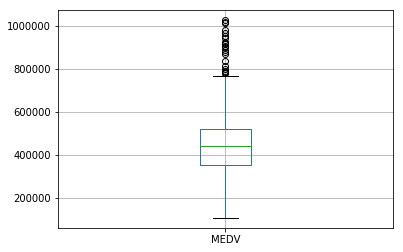

In [31]:
#BOXPLOT FOR PRICES
import matplotlib.pyplot as plt
data[['MEDV']].boxplot()
plt.show()

In [86]:
# Creating a new dataframe by removing MEDVbucket and LSTAT attribute for seeing the correlation matrix
data1 = data.drop('MEDVbucket', axis = 1)
data1 = data1.drop('LSTAT', axis = 1)

In [87]:
data1.head(5)

,RM,PTRATIO,MEDV,Log_LSTAT
0,6.575,15.3,504000.0,1.605430
1,6.421,17.8,453600.0,2.212660
2,7.185,17.8,728700.0,1.393766
3,6.998,18.7,701400.0,1.078410
4,7.147,18.7,760200.0,1.673351


In [88]:
data1.corr()

,RM,PTRATIO,MEDV,Log_LSTAT
RM,1.000000,-0.304559,0.697209,-0.654686
PTRATIO,-0.304559,1.000000,-0.519034,0.397864
MEDV,0.697209,-0.519034,1.000000,-0.821752
Log_LSTAT,-0.654686,0.397864,-0.821752,1.000000


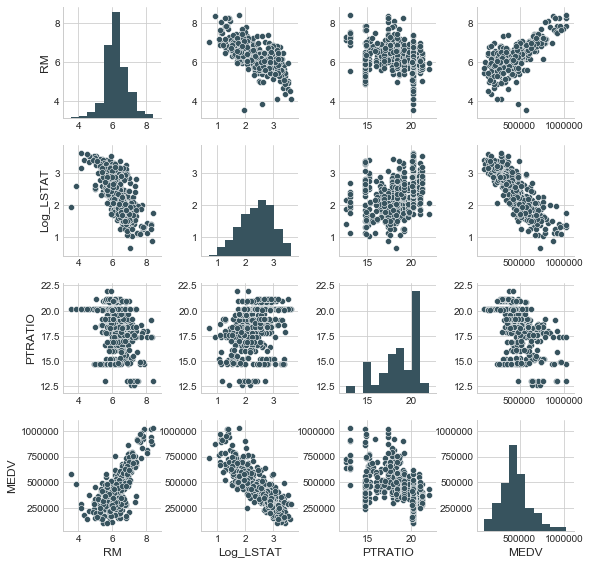

In [90]:
import seaborn as sns
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.pairplot(data1,size = 2,vars = ['RM','Log_LSTAT','PTRATIO','MEDV'])
plt.show()

In [91]:
features = data.drop('MEDV', axis = 1)
features = features.drop('MEDVbucket', axis = 1)
features = features.drop('LSTAT', axis = 1)
features.head(10)

,RM,PTRATIO,Log_LSTAT
0,6.575,15.3,1.605430
1,6.421,17.8,2.212660
2,7.185,17.8,1.393766
3,6.998,18.7,1.078410
4,7.147,18.7,1.673351
5,6.430,18.7,1.650580
6,6.012,15.2,2.520113
7,6.172,15.2,2.952303
8,5.631,15.2,3.398861
9,6.004,15.2,2.839078


In [93]:
fit = np.polyfit(features['RM'], prices, deg=1)
fit

array([ 179098.59189784, -663283.91058252])

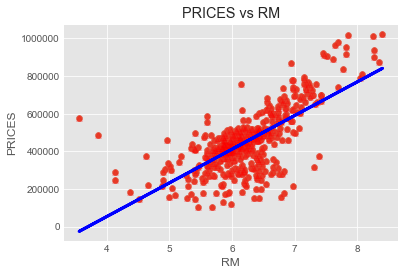

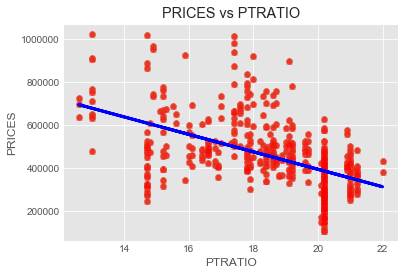

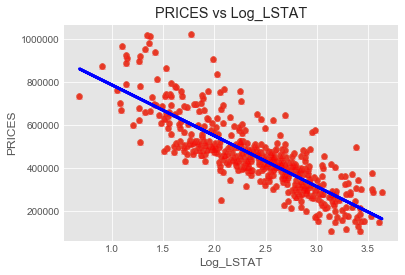

In [95]:
matplotlib.style.use('ggplot')

for col in features.columns:

    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) #this functin will automatically scale the plots..keep the same scale for all
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, '^', c='r',alpha=0.2)
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='b', linewidth=3)
    plt.title('PRICES vs '+ str(col))
    plt.xlabel(col) 
    plt.ylabel('PRICES')
    plt.show()

In [96]:
#Goodness of Fit
from sklearn.metrics import r2_score

In [43]:
# R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

In [99]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """    
    score = r2_score(y_true,y_predict)
    return score

In [98]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=.2, random_state=0)

In [48]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [49]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
reg.coef_

array([  65948.62843111,  -17295.60802263, -164543.17533674])

In [51]:
X = data[['RM','PTRATIO','Log_LSTAT']]
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RM,65948.628431
PTRATIO,-17295.608023
Log_LSTAT,-164543.175337


In [52]:
a = reg.predict(X_test)

In [53]:
a[0:5]

array([ 428370.97364953,  666944.90309242,  319254.12346356,
        369787.38056132,  515689.05525229])

In [54]:
performance_metric(y_test,a)

0.73062131319180124

In [55]:
y_test[0:5]

15     417900.0
250    632100.0
142    281400.0
392    577500.0
90     474600.0
Name: MEDV, dtype: float64

In [58]:
a[0:5]

array([ 428370.97364953,  666944.90309242,  319254.12346356,
        369787.38056132,  515689.05525229])

In [69]:
residual = y_test - a
residual.head(5)

15     -10470.973650
250    -34844.903092
142    -37854.123464
392    207712.619439
90     -41089.055252
Name: MEDV, dtype: float64

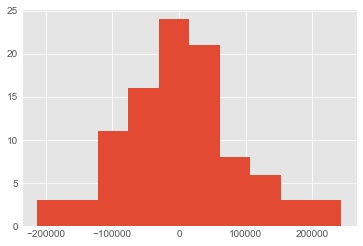

In [60]:
# Residual is normally distributed
plt.hist(residual)
plt.show()

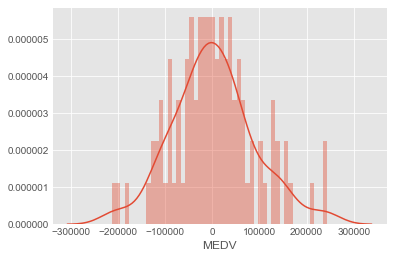

In [61]:
sns.distplot(residual,bins=50)
plt.show()

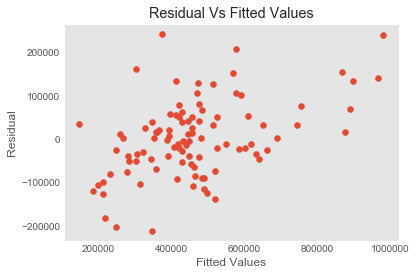

In [62]:
#There is no pattern found in the Residual Vs Fitted Values, hence we can say that the data is linear and 
# the error term has constant variance (homoskedasticity)
plt.scatter(y_test,residual)
plt.title('Residual Vs Fitted Values')
plt.xlabel('Fitted Values') 
plt.ylabel('Residual')
plt.grid(False)
plt.show()

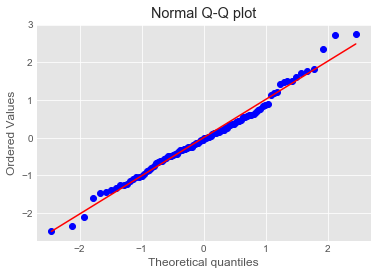

In [63]:
# Q-Q Plot
# The q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set. 
# Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. 
# Absence of normality in the errors can be seen with deviation in the straight line.
import scipy.stats as stats
z = (residual-np.mean(residual))/np.std(residual)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [64]:
import numpy as np
sz = np.sqrt(np.abs(z))
sz.head(4)

15     0.385301
250    0.653641
142    0.679460
392    1.532035
Name: MEDV, dtype: float64

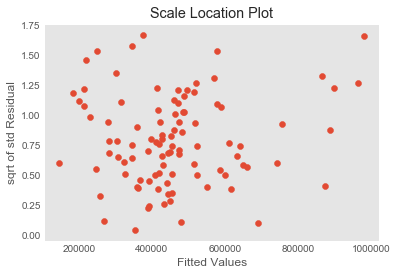

In [65]:
# Scale Location Plot
# This plot is also used to detect homoskedasticity (assumption of equal variance). It shows how the residual are spread along 
# the range of predictors. It’s similar to residual vs fitted value plot except it uses standardized residual values. 
# Ideally, there should be no discernible pattern in the plot. This would imply that errors are normally distributed. 
# if the plot shows any discernible pattern (probably a funnel shape), it would imply non-normal distribution of errors.
plt.scatter(y_test,sz)
plt.title('Scale Location Plot')
plt.xlabel('Fitted Values') 
plt.ylabel('sqrt of std Residual')
plt.grid(False)
plt.show()